# Imports

In [257]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [258]:
n = 5 # 5 increase n 
label_name = "stat6"
layers = [11 ,5 , 2] #[7, 2]

epochs = 3000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [259]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [260]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 1.3864516019821167
Epoch 1, Loss 1.3735719919204712
Epoch 2, Loss 1.386095404624939
Epoch 3, Loss 1.389192283153534
Epoch 4, Loss 1.400644063949585
Epoch 5, Loss 1.3958412408828735
Epoch 6, Loss 1.3784685134887695
Epoch 7, Loss 1.385607123374939
Epoch 8, Loss 1.3762248158454895
Epoch 9, Loss 1.403355598449707
Epoch 10, Loss 1.3894168734550476
Epoch 11, Loss 1.381166696548462
Epoch 12, Loss 1.3913467526435852
Epoch 13, Loss 1.3731058239936829
Epoch 14, Loss 1.3831228017807007
Epoch 15, Loss 1.367928922176361
Epoch 16, Loss 1.3900389075279236
Epoch 17, Loss 1.3898690938949585
Epoch 18, Loss 1.386440932750702
Epoch 19, Loss 1.3948407173156738
Epoch 20, Loss 1.3908364176750183
Epoch 21, Loss 1.3848081231117249
Epoch 22, Loss 1.3966606855392456
Epoch 23, Loss 1.3693135380744934
Epoch 24, Loss 1.388505458831787
Epoch 25, Loss 1.3794869184494019
Epoch 26, Loss 1.4015408158302307
Epoch 27, Loss 1.3927666544914246
Epoch 28, Loss 1.37510484457016
Epoch 29, Loss 1.391888439655304
Ep

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

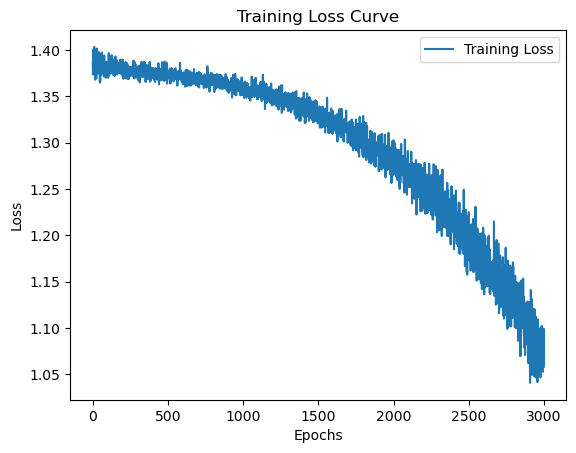

In [261]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[43, 8], [13, 32]]
Accuracy for class 0 = 84.31372549019608%
Accuracy for class 1 = 71.11111111111111%
Overall accuracy = 78.125%


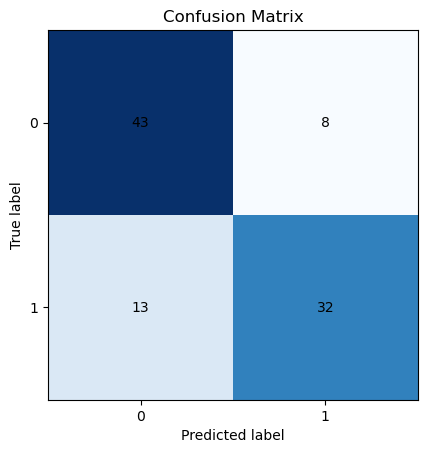

In [262]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

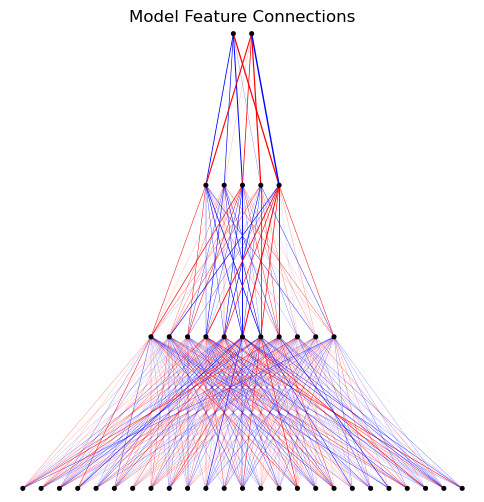

In [263]:
model.plot_connections()

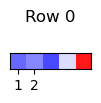

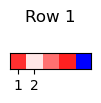

In [264]:
model.plot_heatmap_feature(2,0)
model.plot_heatmap_feature(2,1)

In [265]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

In [268]:
import pandas as pd
from itertools import combinations

# Load the dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
data = pd.read_csv(file_path)

# Function to count inversions in a permutation
def count_inversions(perm):
    inversions = 0
    for i, j in combinations(range(len(perm)), 2):
        if perm[i] > perm[j]:
            inversions += 1
    return inversions

# Extract permutations and calculate inversions
data['permutation_tuple'] = data['permutation'].apply(eval)
data['inversions'] = data['permutation_tuple'].apply(count_inversions)

# Calculate stat6 based on the number of inversions
data['calculated_stat6'] = data['inversions'] % 2

# Verify the rule
verification = data['stat6'] == data['calculated_stat6']
accuracy = verification.mean()

# Display the accuracy and a sample of the data
print("Accuracy:", accuracy)


Accuracy: 1.0
